In [1]:
# packages to store and manipulate data
import pandas as pd
import numpy as np
# plotting packages
import matplotlib.pyplot as plt
import seaborn as sns
# model building package
import sklearn
# package to clean text
import re

df = pd.read_csv('neet_tweet_data1.csv')

In [2]:
df.head()

,id,created_at,retweet_count,source,user_id,user_name,user_description,user_follower_count,user_friends_count,user_location,user_verified,user_url,tweet,length_of_tweet
0,1321944050908360704,2020-10-29 22:36:36,0,Twitter for Android,1320154393153593346,Harshad Mehta,Risk Hai to Ishq Hai #ParodyAccount,97,124,Hindustan,False,NaN,Everyone's a gangsta until major test comes 😶😶...,53
1,1321942208807919616,2020-10-29 22:29:17,0,Twitter for iPhone,716247007,miriam cresta,CEO Junior Achievement Italia #optimistic for ...,1051,1000,NaN,False,https://t.co/8iPzaMDIP3,Riactivate and reskilling #NEET with an Entre...,102
2,1321928713970372614,2020-10-29 21:35:40,0,Twitter for iPhone,161732743,Jem Rycraft,NaN,506,717,"Southampton, UK",False,NaN,@HilaryReadOn A4: Have recorded zoom interview...,144
3,1321921993852231680,2020-10-29 21:08:58,0,Twitter for iPhone,161732743,Jem Rycraft,NaN,506,717,"Southampton, UK",False,NaN,@HilaryReadOn A1: I Work for a charity provide...,140
4,1321912147056582656,2020-10-29 20:29:50,0,Twitter Web App,1309366772017950721,Paripoorna Digital,Paripoorna Digital enables students to prepare...,1,0,Trichy,False,https://t.co/xinvFfDTYP,Chemistry - Question of the day.\n\nFor more d...,139


In [3]:
df=df['tweet']
df=df.dropna()
df.shape

(500,)

In [4]:
type(df)

pandas.core.series.Series

In [5]:
df=pd.DataFrame(df)
df.head(5)

,tweet
0,Everyone's a gangsta until major test comes 😶😶...
1,Riactivate and reskilling #NEET with an Entre...
2,@HilaryReadOn A4: Have recorded zoom interview...
3,@HilaryReadOn A1: I Work for a charity provide...
4,Chemistry - Question of the day.\n\nFor more d...


In [6]:
def find_retweeted(tweet):
    '''This function will extract the twitter handles of retweed people'''
    return re.findall('(?<=RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)
def find_mentioned(tweet):
    '''This function will extract the twitter handles of people mentioned in the tweet'''
    return re.findall('(?<!RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)
def find_hashtags(tweet):
    '''This function will extract hashtags'''
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', tweet)

In [7]:
# two sample tweets
my_tweet = 'RT @our_codingclub: Can @you find #all the #hashtags?'
my_other_tweet = 'Not a retweet. All views @my own'

In [8]:
# make new columns for retweeted usernames, mentioned usernames and hashtags
df['retweeted'] = df.tweet.apply(find_retweeted)
df['mentioned'] = df.tweet.apply(find_mentioned)
df['hashtags'] = df.tweet.apply(find_hashtags)

In [9]:
df.sample(5)

,tweet,retweeted,mentioned,hashtags
438,@ifluxeducare\n👉Follow on Instagram and FB\nSt...,[],[@ifluxeducare],[]
120,@MoHFW_INDIA @EduMinOfIndia @narendramodi @PMO...,[],"[@MoHFW_INDIA, @EduMinOfIndia, @narendramodi, ...","[#NEET, #neetcounselling, #NEET2020, #MCC]"
35,#BREAKING \nTN govt issues GO providing 7.5% r...,[],[],[#BREAKING]
185,https://t.co/nIebUaJcjm\nMCC All India Quota C...,[],[],[#BIOLOGYSIMPLIFIEDTAMIL]
442,Law minister C Ve Shanmugam said that the #Ta...,[],[],[#TamilNadu]


In [10]:
# take the rows from the hashtag columns where there are actually hashtags
hashtags_list_df = df.loc[df.hashtags.apply(lambda hashtags_list: hashtags_list !=[]),['hashtags']]
hashtags_list_df

,hashtags
0,[#NEET]
1,[#NEET]
3,[#NEET]
5,"[#neet, #NEETResult2020, #neetcounselling, #JE..."
7,[#neet]
...,...
494,"[#NEETResult2020, #NEET]"
495,[#NEET]
497,[#NEET]
498,[#NEET]


In [11]:
# create dataframe where each use of hashtag gets its own row
flattened_hashtags_df = pd.DataFrame([hashtag for hashtags_list in hashtags_list_df.hashtags for hashtag in hashtags_list],columns=['hashtag'])

# number of unique hashtags
flattened_hashtags_df['hashtag'].unique().size

360

In [12]:
# count of appearances of each hashtag
popular_hashtags = flattened_hashtags_df.groupby('hashtag').size()\
.reset_index(name='counts')\
.sort_values('counts', ascending=False)\
.reset_index(drop=True)

H:\Anaconda\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  del sys.path[0]


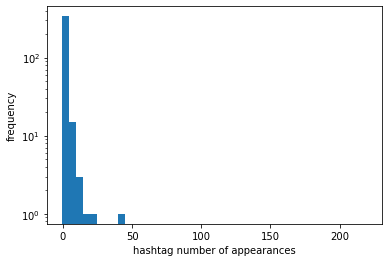

In [13]:
# number of times each hashtag appears
counts = flattened_hashtags_df.groupby(['hashtag']).size()\
.reset_index(name='counts')\
.counts
# define bins for histogram
my_bins = np.arange(0,counts.max()+2, 5)-0.5
# plot histogram of tweet counts
plt.figure()
plt.hist(counts, bins = my_bins)
plt.xlabels = np.arange(1,counts.max()+1, 1)
plt.xlabel('hashtag number of appearances')
plt.ylabel('frequency')
plt.yscale('log', nonposy='clip')
plt.show()

In [14]:
# take hashtags which appear at least this amount of times
min_appearance = 10
# find popular hashtags - make into python set for efficiency
popular_hashtags_set = set(popular_hashtags[
popular_hashtags.counts>=min_appearance
]['hashtag'])

In [15]:
# make a new column with only the popular hashtags
hashtags_list_df['popular_hashtags'] = hashtags_list_df.hashtags.apply(lambda hashtag_list: [hashtag for hashtag in hashtag_list if hashtag in popular_hashtags_set])

# drop rows without popular hashtag
popular_hashtags_list_df = hashtags_list_df.loc[hashtags_list_df.popular_hashtags.apply(lambda hashtag_list: hashtag_list !=[])]


# make new dataframe
hashtag_vector_df = popular_hashtags_list_df.loc[:, ['popular_hashtags']]
for hashtag in popular_hashtags_set:
# make columns to encode presence of hashtags
    hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(lambda hashtag_list: int(hashtag in hashtag_list))

In [16]:
hashtag_vector_df.sample(15)

,popular_hashtags,#NEETResult2020,#NEET,#neet,#JEE,#BanNEET,#neetcounselling,#NEET2020
445,[#NEET],0,1,0,0,0,0,0
164,[#NEET],0,1,0,0,0,0,0
476,[#neet],0,0,1,0,0,0,0
160,[#NEET],0,1,0,0,0,0,0
49,[#neet],0,0,1,0,0,0,0
412,[#neet],0,0,1,0,0,0,0
223,[#NEET],0,1,0,0,0,0,0
238,[#NEET],0,1,0,0,0,0,0
467,[#NEET],0,1,0,0,0,0,0
230,[#NEET],0,1,0,0,0,0,0


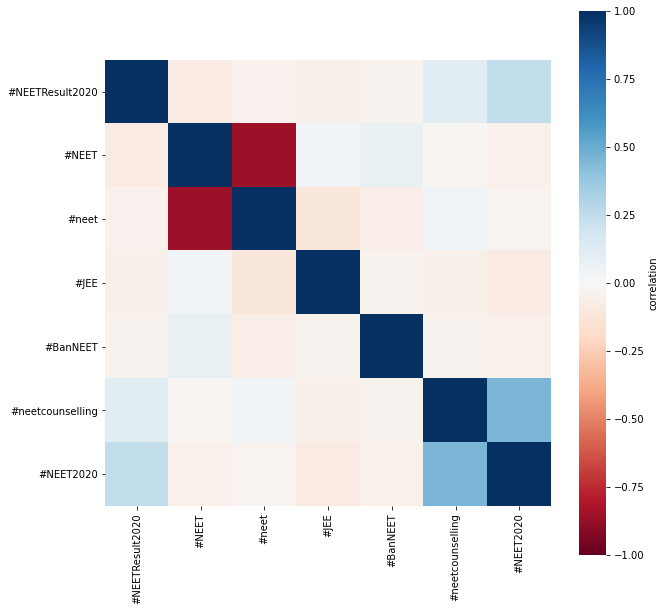

In [17]:
hashtag_matrix = hashtag_vector_df.drop('popular_hashtags', axis=1)

# calculate the correlation matrix
correlations = hashtag_matrix.corr()
# plot the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(correlations, cmap='RdBu',vmin=-1,vmax=1,square = True,cbar_kws={'label':'correlation'})
plt.show()

In [18]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

In [19]:
def remove_links(tweet):
    '''Takes a string and removes web links from it'''
    tweet = re.sub(r'http\S+', '', tweet) # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet) # rempve bitly links
    tweet = tweet.strip('[link]') # remove [links]
    return tweet
def remove_users(tweet):
    '''Takes a string and removes retweet and @user information'''
    tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove retweet
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove tweeted at
    return tweet

In [20]:
my_stopwords = nltk.corpus.stopwords.words('english')
word_rooter = nltk.stem.snowball.PorterStemmer(ignore_stopwords=False).stem
my_punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@'

# cleaning master function
def clean_tweet(tweet, bigrams=False):
    tweet = remove_users(tweet)
    tweet = remove_links(tweet)
    tweet = tweet.lower() # lower case
    tweet = tweet.replace('b', '',1)
    tweet = re.sub('['+my_punctuation + ']+', ' ', tweet) # strip punctuation
    tweet = re.sub('\s+', ' ', tweet) #remove double spacing
    tweet = re.sub('([0-9]+)', '', tweet) # remove numbers
    tweet_token_list = [word for word in tweet.split(' ') if word not in my_stopwords] # remove stopwords
    tweet_token_list = [word_rooter(word) if '#' not in word else word for word in tweet_token_list] # apply word rooter
    if bigrams:
        tweet_token_list = tweet_token_list+[tweet_token_list[i]+'_'+tweet_token_list[i+1]

    for i in range(len(tweet_token_list)-1)]
        tweet = ' '.join(tweet_token_list)
    return tweet

df['clean_tweet'] = df.tweet.apply(clean_tweet)

In [21]:
df.sample(10)

,tweet,retweeted,mentioned,hashtags,clean_tweet
387,FAQ’S (Frequently Asked questions) For NEET - ...,[],[],"[#NEET, #MBBS, #BDS, #NEET2020]",faq’s frequently asked questions for neet unde...
181,Uttar Pradesh Chief Minister @myogiadityanath ...,[],[@myogiadityanath],[],uttar pradesh chief minister felicitated year...
195,We Demanded POSTPONEMENT of Exams/- (Ignored)\...,[],[],[],we demanded postponement of exams ignored we d...
472,This Dussehra spread a word of light that will...,[],[],[],this dussehra spread a word of light that will...
174,Prepare for NEET with our daily MCQ #biology #...,[],[],"[#biology, #NEET, #RadiantClassesDehradun, #To...",prepare for neet with our daily mcq #iology #n...
160,@DrRPNishank @drharshvardhan @PMOIndia The lif...,[],"[@DrRPNishank, @drharshvardhan, @PMOIndia]",[#NEET],the life of a #neet aspirant and future docto...
298,Easy to Crack IIT-JEE and NEET with The Hind G...,[],[],[],easy to crack iit jee and neet with the hind g...
12,wht tf is #NEET counseling harder than the exa...,[],[],[#NEET],wht tf is #neet counseling harder than the exa...
59,Heartiest Congratulations to our dear student ...,[],[],[#NEET2020],heartiest congratulations to our dear student ...
11,The decision comes even though Governor Banwar...,[],[],[],the decision comes even though governor anwari...


In [22]:
from sklearn.feature_extraction.text import CountVectorizer
# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+')
# apply transformation
tf = vectorizer.fit_transform(df['clean_tweet']).toarray()
# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

In [23]:
from sklearn.decomposition import LatentDirichletAllocation
number_of_topics = 10
model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

In [24]:
model.fit(tf)

LatentDirichletAllocation(random_state=0)

In [25]:
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i]) for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)

In [26]:
no_top_words = 10
display_topics(model, tf_feature_names, no_top_words)

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights,Topic 8 words,Topic 8 weights,Topic 9 words,Topic 9 weights
0,#neet,162.0,of,90.6,you,50.1,to,43.0,…,38.6,the,90.7,neet,28.1,and,96.4,govt,33.1,amp,49.1
1,is,52.3,a,68.1,your,30.0,#neet,37.1,neet,36.5,…,47.7,…,27.9,for,43.3,students,31.1,#neet,44.5
2,the,34.7,…,48.5,…,25.8,in,25.0,to,33.0,we,39.1,and,26.2,…,39.2,for,28.3,neet,35.2
3,i,29.9,the,35.4,to,22.4,…,20.1,counselling,29.3,will,25.6,online,26.1,with,37.5,…,27.9,…,28.0
4,not,21.6,to,23.4,and,21.6,s,18.8,all,22.8,are,24.8,with,25.4,on,27.6,in,22.1,in,21.5
5,for,21.4,in,16.7,in,20.8,reservation,18.0,has,20.1,for,20.5,for,22.4,neet,19.0,#neet,21.3,for,6.6
6,to,17.6,is,14.5,this,14.8,an,17.3,for,16.2,to,20.2,jee,20.0,preparation,16.1,medical,19.0,from,6.6
7,it,17.5,from,8.3,the,10.9,from,14.5,a,13.9,in,19.5,get,19.3,jee,15.6,to,12.3,on,4.9
8,this,16.1,get,6.3,all,10.4,students,9.1,the,13.9,of,15.4,to,15.0,medical,13.7,reservation,8.2,jee,4.4
9,…,13.4,e,6.2,is,9.9,has,7.1,#neet,12.3,on,13.3,preparation,11.1,i,0.3,is,7.7,and,1.6


In [27]:
'''
dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model5.gensim')
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)
'''


"\ndictionary = gensim.corpora.Dictionary.load('dictionary.gensim')\ncorpus = pickle.load(open('corpus.pkl', 'rb'))\nlda = gensim.models.ldamodel.LdaModel.load('model5.gensim')\nimport pyLDAvis.gensim\nlda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)\npyLDAvis.display(lda_display)\n"